In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
batch_size = 8

In [ ]:
!pip install -U fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
vehicle_types = [
    "Sedan",
    "Hatchback",
    "SUV",
    "Coupe",
    "Convertible",
    "Station Wagon",
    "Standard Bike",
    "Sport Bike",
    "Cruiser",
    "Dirt Bike",
    "Pickup Truck",
    "Lorry",
    "Tanker Truck",
    "Dump Truck",
    "Bus",
    "Passenger Van",
    "Cargo Van",
    "ATV",
    "4x4",
    "Forklift",
    "Golf Cart",
    "Ambulance",
    "Fire Truck",
    "Military Vehicle",
    "Train"
]
print(len(vehicle_types))

25


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
doc(search_images_ddg)

In [ ]:
image_urls = search_images_ddg(vehicle_types[0], max_images=200)

In [ ]:
print(len(image_urls))

200


In [ ]:
doc(download_url)

In [ ]:
doc(download_images)

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
data_path = "vehicle_data"

if not os.path.exists(data_path):
  os.mkdir(data_path)

for i in vehicle_types:
  destination = f'{data_path}/{i}'
  if not os.path.exists(destination):
    os.mkdir(destination)
  try:
    image_urls = search_images_ddg(i, max_images=200)
    download_images(destination, urls=image_urls)
  except Exception as e:
    print(e)
    continue

In [ ]:
doc(get_image_files)

In [ ]:
extracted_image_paths = get_image_files(data_path)

In [ ]:
len(extracted_image_paths)

4497

In [ ]:
invalid_images = verify_images(extracted_image_paths)

In [ ]:
print(len(invalid_images))

276


In [ ]:
print(len(extracted_image_paths))
print(len(invalid_images))
invalid_images.map(Path.unlink)
print(len(extracted_image_paths))
print(len(invalid_images))

4497
276
4497
276


In [ ]:
extracted_image_paths = get_image_files(data_path)
print(len(extracted_image_paths))

4221


In [ ]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dataloaders = data_block.dataloaders(data_path, bs=batch_size)

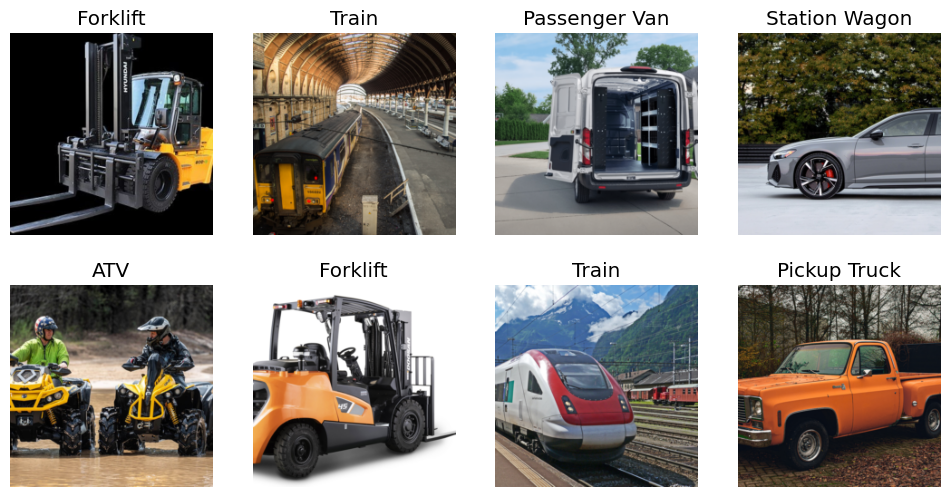

In [ ]:
dataloaders.train.show_batch(max_n=8, nrows=2)

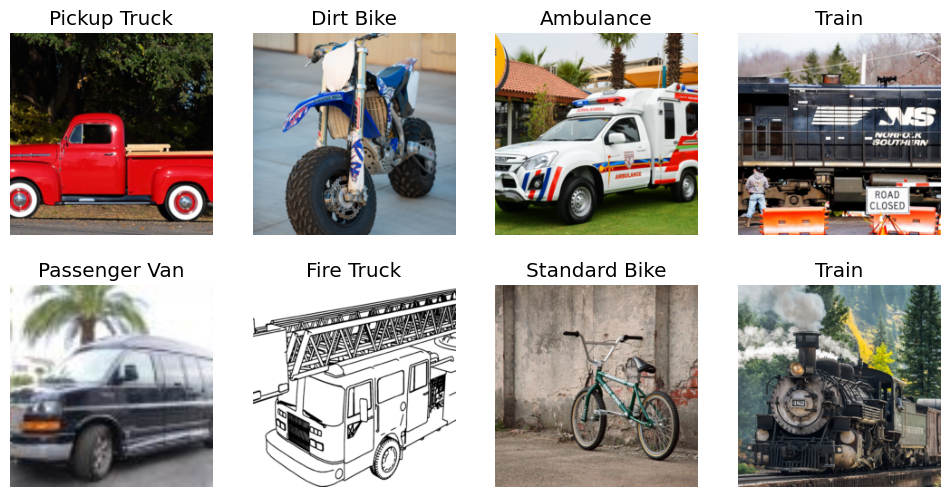

In [ ]:
dataloaders.valid.show_batch(max_n=8, nrows=2)

In [ ]:
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastbook import *

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
dest = '00697bd5-1b9d-4b1e-8034-d0811c71279e.jpg'

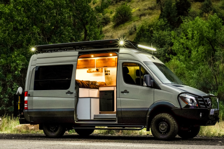

In [ ]:
image = Image.open('/content/drive/MyDrive/vehicle_data/4x4/00697bd5-1b9d-4b1e-8034-d0811c71279e.jpg')
image.to_thumb(224,224)

In [ ]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
data_path = 'vehicle_data'
print(os.path.exists(data_path))

True


In [ ]:
batch_size = 8

In [ ]:
dataloaders = data_block.dataloaders(data_path, bs=batch_size)

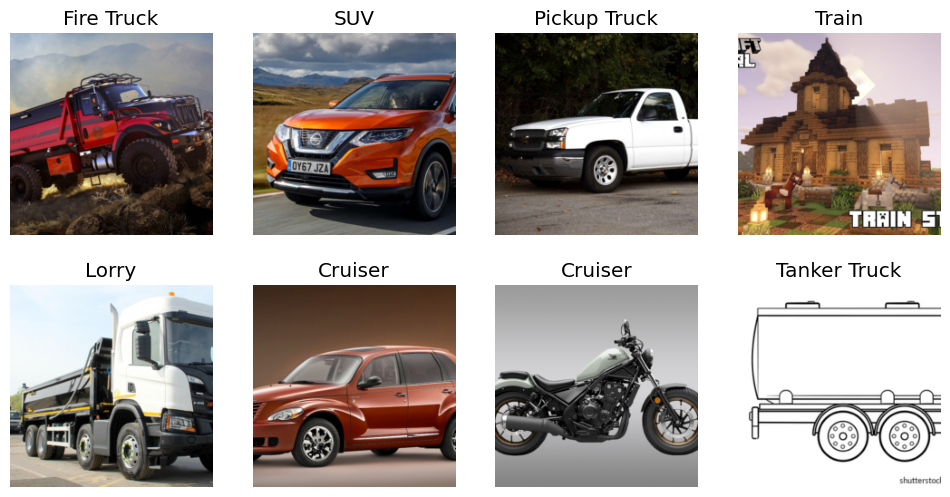

In [ ]:
dataloaders.train.show_batch(max_n=8, nrows=2)

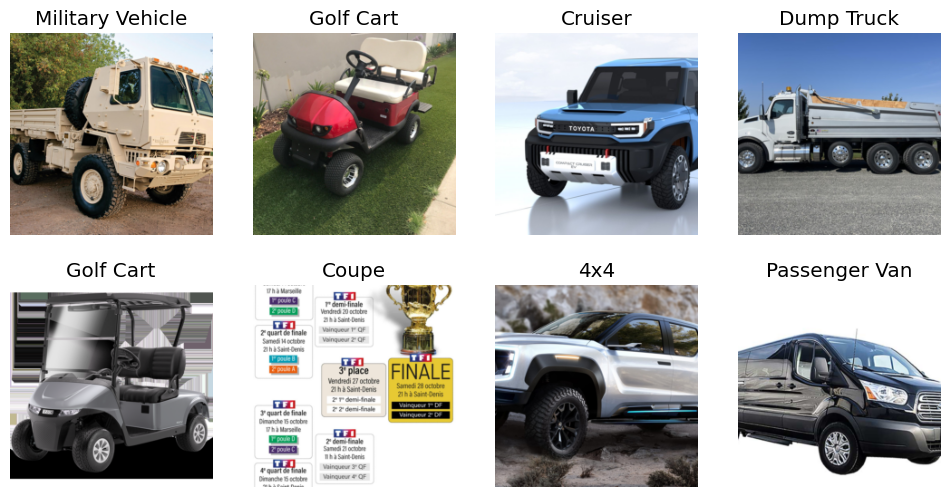

In [ ]:
dataloaders.valid.show_batch(max_n=8, nrows=2)

In [ ]:
data_block = data_block.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

In [ ]:
data_loaders = data_block.dataloaders(data_path, bs=batch_size)

In [ ]:
print(os.getcwd())

/content/drive/MyDrive


In [ ]:
dataloaders = 'dataloaders'
if not os.path.exists(f'{os.getcwd()}/{dataloaders}'):
  os.mkdir(f'{os.getcwd()}/{dataloaders}')

In [ ]:
torch.save(data_loaders, f'{dataloaders}/data_loaders_v0.pkl')